In [426]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
#from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display




In [427]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240905_143329.CSV"
pre_wix_csv=pre_wix_csv="data/commute/CSVLog_20240903_141714.CSV"
output_folder_path = 'Analysis/Date/Compare/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [428]:
pre_wix_df=pd.read_csv(pre_wix_csv)
pre_wix_df.columns = pre_wix_df.columns.str.strip()
pre_wix_df.head()

,Time (sec),Instant fuel economy (MPG),Intake manifold absolute pressure (inHg),Engine RPM (RPM),Vehicle speed (MPH),Ignition timing advance for #1 cylinder (deg),Mass air flow rate (lb/min),Ambient air temperature (°F),Relative accelerator pedal position (%),Intake air temperature bank 1 sensor 1 (°F),Boost (psi),Engine Power (hp),Engine Torque (lb•ft),Trip Distance (miles),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Altitude (ft)
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000
1,0.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000
2,0.501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000
3,0.751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.86,-93.342,854.906
4,1.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.86,-93.342,854.906


In [429]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [430]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Ignition timing advance for #1 cylinder (deg)', 'Mass air flow rate (lb/min)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Boost (psi)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (ft)']


In [431]:
df=df[['Time (sec)',
       'Trip Distance (miles)',
       'Vehicle speed (MPH)',
       'Engine RPM (RPM)',
       'Boost (psi)',
       'Relative accelerator pedal position (%)',
       'Engine Power (hp)',
       'Engine Torque (lb•ft)',
       'Mass air flow rate (lb/min)',
       'Intake manifold absolute pressure (inHg)',
       'Ambient air temperature (°F)',
       'Intake air temperature bank 1  sensor 1 (°F)',
       'Instant fuel economy (MPG)',
       'Trip Fuel Economy (MPG)',
       'Latitude (deg)',
       'Longitude (deg)']]
df.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,0.251,0.0,0.0,0.0,0.0,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,0.500,0.0,0.0,0.0,0.0,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
3,0.751,0.0,0.0,0.0,0.0,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
4,1.001,0.0,0.0,0.0,0.0,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342


In [432]:
pre_wix_df=pre_wix_df[['Time (sec)',
                       'Vehicle speed (MPH)',
                       'Relative accelerator pedal position (%)',
                       'Engine RPM (RPM)',
                       'Boost (psi)',
                       'Engine Power (hp)',
                       'Engine Torque (lb•ft)',
                       'Mass air flow rate (lb/min)',
                       'Intake manifold absolute pressure (inHg)',
                       'Ambient air temperature (°F)',
                       'Trip Distance (miles)',
                       'Instant fuel economy (MPG)',
                       'Trip Fuel Economy (MPG)',
                       'Latitude (deg)',
                       'Longitude (deg)']]
df.head()

pre_wix_df.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
1,0.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
2,0.501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
3,0.751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.86,-93.342
4,1.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.86,-93.342


In [433]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,0.251,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,0.500,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
3,0.751,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
4,1.001,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.092,0.0,0.0,0.0,0.0,0.0,44.861,-93.342


In [434]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Filter rows based on column: 'Mass air flow rate (lb/min)'
    df = df[~(df['Mass air flow rate (lb/min)'] == 0)]
    # Round columns 'Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)' and 2 other columns (Number of decimals: 3)
    df = df.round({'Instant fuel economy (MPG)': 3, 'Trip Fuel Economy (MPG)': 3, 'Trip Distance (miles)': 3, 'Intake air temperature bank 1  sensor 1 (°F)': 3})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)'(Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2})
    # Round columns 'Vehicle speed (MPH)', 'Engine RPM (RPM)' (Number of decimals: 0)
    df = df.round({'Vehicle speed (MPH)': 0, 'Engine RPM (RPM)': 0})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
1,0.251,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,0.500,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
3,0.751,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
4,1.001,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
5,1.251,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342


In [435]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Filter rows based on column: 'Mass air flow rate (lb/min)'
    df = df[~(df['Mass air flow rate (lb/min)'] == 0)]
    # Round columns 'Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)' and 2 other columns (Number of decimals: 3)
    df = df.round({'Instant fuel economy (MPG)': 3, 'Trip Fuel Economy (MPG)': 3, 'Trip Distance (miles)': 3, 'Intake air temperature bank 1  sensor 1 (°F)': 3})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2})
    # Round columns 'Vehicle speed (MPH)', 'Engine RPM (RPM)' (Number of decimals: 0)
    df = df.round({'Vehicle speed (MPH)': 0, 'Engine RPM (RPM)': 0})
    return df

pre_wix_df_clean = clean_data(pre_wix_df.copy())
pre_wix_df_clean.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
5,1.251,0.0,0.0,0.0,0.000,23.903,0.000,2.62,0.00,0.0,0.0,0.0,0.0,44.86,-93.342
6,1.501,0.0,0.0,1605.0,-4.351,21.721,71.069,2.38,20.67,80.6,0.0,0.0,0.0,44.86,-93.342
7,1.751,0.0,0.0,1607.0,-4.786,22.891,74.801,2.51,20.08,80.6,0.0,0.0,0.0,44.86,-93.342
8,2.001,0.0,0.0,1634.0,-4.786,22.746,73.123,2.50,20.08,80.6,0.0,0.0,0.0,44.86,-93.342
9,2.251,0.0,0.0,1632.0,-4.786,22.891,73.667,2.51,20.08,80.6,0.0,0.0,0.0,44.86,-93.342


In [436]:
column_list=df_clean.columns.tolist()
print(column_list)

['Time (sec)', 'Trip Distance (miles)', 'Vehicle speed (MPH)', 'Engine RPM (RPM)', 'Boost (psi)', 'Relative accelerator pedal position (%)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Mass air flow rate (lb/min)', 'Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)']


In [437]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
1,0.251,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,0.000,0.000
2,0.500,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
3,0.751,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
4,1.001,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342
5,1.251,0.0,0.0,0.0,0.01,0.0,28.17,0.0,3.09,0.0,0.0,0.0,0.0,0.0,44.861,-93.342


In [438]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
66,16.501,0.0,0.0,1313.0,-9.137,0.000,12.102,48.401,1.33,11.22,82.4,89.6,0.000,0.000,44.861,-93.342
67,16.752,0.0,1.0,1052.0,-8.122,0.000,10.933,54.557,1.20,13.29,82.4,89.6,1.559,0.006,44.861,-93.342
68,17.001,0.0,2.0,990.0,-7.542,0.000,9.502,50.437,1.04,14.47,82.4,89.6,2.690,0.022,44.861,-93.342
69,17.251,0.0,2.0,1010.0,-7.687,1.176,8.756,45.545,0.96,14.17,82.4,89.6,2.919,0.038,44.861,-93.342
70,17.500,0.0,2.0,1026.0,-7.977,1.569,8.091,41.429,0.89,13.58,82.4,89.6,4.212,0.052,44.861,-93.342


In [439]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
pre_wix_df_clean['next_mph'] = pre_wix_df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (pre_wix_df_clean['Vehicle speed (MPH)'] > 0) | ((pre_wix_df_clean['Vehicle speed (MPH)'] == 0) & (pre_wix_df_clean['next_mph'] > 0))
pre_wix_df_moving= pre_wix_df_clean[mask].drop(columns=['next_mph'])
pre_wix_df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
178,44.500,0.0,0.0,979.0,-8.267,8.348,44.773,0.92,12.99,80.6,0.0,0.000,0.000,44.861,-93.342
179,44.750,1.0,0.0,980.0,-8.412,8.263,44.274,0.91,12.70,80.6,0.0,1.031,0.004,44.861,-93.342
180,45.001,1.0,0.0,986.0,-8.412,8.094,43.117,0.89,12.70,80.6,0.0,2.105,0.011,44.861,-93.342
181,45.250,1.0,0.0,986.0,-8.557,8.167,43.513,0.90,12.40,80.6,0.0,2.086,0.016,44.861,-93.342
182,45.500,2.0,0.0,994.0,-8.412,8.167,43.130,0.90,12.70,80.6,0.0,3.130,0.027,44.861,-93.342


In [440]:
#experimenting 
#df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
#df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
#df_moving = df_moving.dropna(subset=['Mass Air/Boost', 'Mass Air/manPress'])
#df_moving.head()

In [441]:
hvexplorer = df_moving.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'ca42b7f2-c222-45b4-b7b0-d0d97853bb36': {'version…

In [442]:
engine_temp=df_moving[['Intake air temperature bank 1  sensor 1 (°F)',
                       'Engine RPM (RPM)',
                       'Engine Torque (lb•ft)',
                       'Intake manifold absolute pressure (inHg)',
                       'Mass air flow rate (lb/min)']]
engine_temp.head()
hvexplorer = engine_temp.hvplot.explorer()
hvexplorer
#engine_temp.describe()

BokehModel(combine_events=True, render_bundle={'docs_json': {'528c98b0-351b-4fcc-8e6b-03c57e30a734': {'version…

In [443]:
pre_wix_df_moving_list=pre_wix_df_moving.columns.tolist()
print(pre_wix_df_moving_list)

['Time (sec)', 'Vehicle speed (MPH)', 'Relative accelerator pedal position (%)', 'Engine RPM (RPM)', 'Boost (psi)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Mass air flow rate (lb/min)', 'Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)', 'Trip Distance (miles)', 'Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)']


In [444]:
# Create an explicit copy of the selected columns
engine_temp = df_moving[['Intake air temperature bank 1  sensor 1 (°F)',
                         'Engine RPM (RPM)',
                         'Engine Torque (lb•ft)',
                         'Intake manifold absolute pressure (inHg)',
                         'Mass air flow rate (lb/min)']].copy()

# Calculate the Simple Moving Average (SMA) without triggering the warning
window_size=50
engine_temp['Torque (lb•ft) SMA'] = engine_temp['Engine Torque (lb•ft)'].rolling(window=window_size).mean()
engine_temp['Engine RPM (RPM) SMA'] = engine_temp['Engine RPM (RPM)'].rolling(window=window_size).mean()
engine_temp['Mass air flow rate (lb/min) SMA'] = engine_temp['Mass air flow rate (lb/min)'].rolling(window=window_size).mean()
engine_temp['Intake manifold absolute pressure (inHg) SMA'] = engine_temp['Intake manifold absolute pressure (inHg)'].rolling(window=window_size).mean()
# Display the first few rows of the modified DataFrame
engine_temp.head()

,Intake air temperature bank 1 sensor 1 (°F),Engine RPM (RPM),Engine Torque (lb•ft),Intake manifold absolute pressure (inHg),Mass air flow rate (lb/min),Torque (lb•ft) SMA,Engine RPM (RPM) SMA,Mass air flow rate (lb/min) SMA,Intake manifold absolute pressure (inHg) SMA
66,89.6,1313.0,48.401,11.22,1.33,NaN,NaN,NaN,NaN
67,89.6,1052.0,54.557,13.29,1.20,NaN,NaN,NaN,NaN
68,89.6,990.0,50.437,14.47,1.04,NaN,NaN,NaN,NaN
69,89.6,1010.0,45.545,14.17,0.96,NaN,NaN,NaN,NaN
70,89.6,1026.0,41.429,13.58,0.89,NaN,NaN,NaN,NaN


In [445]:
# Create an explicit copy of the selected columns
engine_temp_pre_wix = pre_wix_df_moving[['Mass air flow rate (lb/min)',
                                         'Engine RPM (RPM)',
                                         'Engine Torque (lb•ft)',
                                         'Intake manifold absolute pressure (inHg)']].copy()

# Calculate the Simple Moving Average (SMA) without triggering the warning
window_size=50
engine_temp_pre_wix['Torque (lb•ft) SMA'] = engine_temp_pre_wix['Engine Torque (lb•ft)'].rolling(window=window_size).mean()
engine_temp_pre_wix['Mass air flow rate (lb/min) SMA'] = engine_temp_pre_wix['Mass air flow rate (lb/min)'].rolling(window=window_size).mean()
engine_temp_pre_wix['Engine RPM (RPM) SMA'] = engine_temp_pre_wix['Engine RPM (RPM)'].rolling(window=window_size).mean()
engine_temp_pre_wix['Intake manifold absolute pressure (inHg) SMA'] = engine_temp_pre_wix['Intake manifold absolute pressure (inHg)'].rolling(window=window_size).mean()
# Display the first few rows of the modified DataFrame
engine_temp_pre_wix.head()

,Mass air flow rate (lb/min),Engine RPM (RPM),Engine Torque (lb•ft),Intake manifold absolute pressure (inHg),Torque (lb•ft) SMA,Mass air flow rate (lb/min) SMA,Engine RPM (RPM) SMA,Intake manifold absolute pressure (inHg) SMA
178,0.92,979.0,44.773,12.99,NaN,NaN,NaN,NaN
179,0.91,980.0,44.274,12.70,NaN,NaN,NaN,NaN
180,0.89,986.0,43.117,12.70,NaN,NaN,NaN,NaN
181,0.90,986.0,43.513,12.40,NaN,NaN,NaN,NaN
182,0.90,994.0,43.130,12.70,NaN,NaN,NaN,NaN


In [446]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(engine_temp):
    # Drop columns: 'Engine RPM (RPM)', 'Engine Torque (lb•ft)' and 2 other columns
    engine_temp = engine_temp.drop(columns=['Engine RPM (RPM)', 'Engine Torque (lb•ft)', 'Intake manifold absolute pressure (inHg)', 'Mass air flow rate (lb/min)'])
    # Drop rows with missing data in column: 'Torque (lb•ft) SMA',
    engine_temp = engine_temp.dropna(subset=['Torque (lb•ft) SMA'])
    # Round column 'Engine (RPM) SMA' (Number of decimals: 0)
    engine_temp = engine_temp.round({'Engine RPM (RPM) SMA': 0})
    # Round columns 'Mass air flow rate (lb/min) SMA', 'Intake manifold absolute pressure (inHg SMA', 'Torque (lb•ft) SMA' (Number of decimals: 3)
    engine_temp = engine_temp.round({'Mass air flow rate (lb/min) SMA': 3, 'Intake manifold absolute pressure (inHg) SMA': 3, 'Torque (lb•ft) SMA': 2})
    # Filter rows based on column: 'Intake manifold absolute pressure (inHg SMA'
    engine_temp = engine_temp[~(engine_temp['Intake manifold absolute pressure (inHg) SMA'].isna())]
    
    # Sort by column: 'Engine (RPM) SMA' (ascending)
    engine_temp = engine_temp.sort_values(['Engine RPM (RPM) SMA'])
    
    # Set 'Engine (RPM) SMA' as index
    engine_temp = engine_temp.set_index('Engine RPM (RPM) SMA')
    
    # Group by the index and calculate the mean for each group
    engine_temp = engine_temp.groupby(engine_temp.index).mean()
    
    # Reset index to make 'Engine (RPM) SMA' a column again
    engine_temp = engine_temp.reset_index()
    
    return engine_temp

engine_temp_clean = clean_data(engine_temp.copy())
engine_temp_clean.head()

,Engine RPM (RPM) SMA,Intake air temperature bank 1 sensor 1 (°F),Torque (lb•ft) SMA,Mass air flow rate (lb/min) SMA,Intake manifold absolute pressure (inHg) SMA
0,952.0,84.2,28.13,0.502,8.966
1,953.0,86.0,29.75,0.550,9.421
2,960.0,86.0,31.60,0.618,9.881
3,965.0,84.2,27.65,0.499,8.801
4,970.0,86.0,33.17,0.681,10.354


In [447]:
hvexplorer = engine_temp_clean.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'578cf099-9917-4d7c-b744-86786632236f': {'version…

In [448]:
engine_temp_pre_wix_clean = clean_data(engine_temp_pre_wix.copy())
engine_temp_pre_wix_clean.head()

,Engine RPM (RPM) SMA,Torque (lb•ft) SMA,Mass air flow rate (lb/min) SMA,Intake manifold absolute pressure (inHg) SMA
0,1035.0,32.29,0.650,9.361
1,1038.0,33.67,0.691,9.780
2,1043.0,28.60,0.588,8.941
3,1049.0,35.22,0.754,10.199
4,1053.0,28.37,0.590,8.859


In [449]:
engine_temp_pre_wix_clean=engine_temp_pre_wix_clean.rename(columns={
    'Torque (lb•ft) SMA':'Torque (lb•ft) SMA PRE',
    'Mass air flow rate (lb/min) SMA':'Mass air flow rate (lb/min) SMA PRE',
    'Engine RPM (RPM) SMA':'Engine RPM (RPM) SMA PRE',
    'Intake manifold absolute pressure (inHg) SMA':'Intake manifold absolute pressure (inHg) SMA PRE'
})
engine_temp_pre_wix_clean.head()

,Engine RPM (RPM) SMA PRE,Torque (lb•ft) SMA PRE,Mass air flow rate (lb/min) SMA PRE,Intake manifold absolute pressure (inHg) SMA PRE
0,1035.0,32.29,0.650,9.361
1,1038.0,33.67,0.691,9.780
2,1043.0,28.60,0.588,8.941
3,1049.0,35.22,0.754,10.199
4,1053.0,28.37,0.590,8.859


In [450]:
hvexplorer = engine_temp_pre_wix_clean.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'1667ab77-c7b0-426d-b470-52d48325d641': {'version…

In [451]:
result = engine_temp_clean.join(engine_temp_pre_wix_clean)
result.head()


,Engine RPM (RPM) SMA,Intake air temperature bank 1 sensor 1 (°F),Torque (lb•ft) SMA,Mass air flow rate (lb/min) SMA,Intake manifold absolute pressure (inHg) SMA,Engine RPM (RPM) SMA PRE,Torque (lb•ft) SMA PRE,Mass air flow rate (lb/min) SMA PRE,Intake manifold absolute pressure (inHg) SMA PRE
0,952.0,84.2,28.13,0.502,8.966,1035.0,32.29,0.650,9.361
1,953.0,86.0,29.75,0.550,9.421,1038.0,33.67,0.691,9.780
2,960.0,86.0,31.60,0.618,9.881,1043.0,28.60,0.588,8.941
3,965.0,84.2,27.65,0.499,8.801,1049.0,35.22,0.754,10.199
4,970.0,86.0,33.17,0.681,10.354,1053.0,28.37,0.590,8.859


In [452]:
def clean_data(result):
    # Drop rows with missing data in column: 'Torque (lb•ft) SMA PRE'
    result = result.dropna(subset=['Torque (lb•ft) SMA PRE'])
    
    # Sort by column: 'Engine (RPM) SMA' (ascending)
    result = result.sort_values(['Engine RPM (RPM) SMA'])
    
    # Set 'Engine (RPM) SMA' as index
    result = result.set_index('Engine RPM (RPM) SMA')
    
    # Group by the index and calculate the mean for each group
    result = result.groupby(result.index).mean()
    
    # Reset index to make 'Engine (RPM) SMA' a column again
    result = result.reset_index()
    
    return result

result_clean = clean_data(result.copy())
result_clean.head()


,Engine RPM (RPM) SMA,Intake air temperature bank 1 sensor 1 (°F),Torque (lb•ft) SMA,Mass air flow rate (lb/min) SMA,Intake manifold absolute pressure (inHg) SMA,Engine RPM (RPM) SMA PRE,Torque (lb•ft) SMA PRE,Mass air flow rate (lb/min) SMA PRE,Intake manifold absolute pressure (inHg) SMA PRE
0,952.0,84.2,28.13,0.502,8.966,1035.0,32.29,0.650,9.361
1,953.0,86.0,29.75,0.550,9.421,1038.0,33.67,0.691,9.780
2,960.0,86.0,31.60,0.618,9.881,1043.0,28.60,0.588,8.941
3,965.0,84.2,27.65,0.499,8.801,1049.0,35.22,0.754,10.199
4,970.0,86.0,33.17,0.681,10.354,1053.0,28.37,0.590,8.859


In [453]:
result_clean=result_clean[['Torque (lb•ft) SMA PRE','Torque (lb•ft) SMA','Engine RPM (RPM) SMA PRE','Engine RPM (RPM) SMA','Intake manifold absolute pressure (inHg) SMA PRE','Intake manifold absolute pressure (inHg) SMA','Mass air flow rate (lb/min) SMA PRE','Mass air flow rate (lb/min) SMA']]
result_clean.head()

,Torque (lb•ft) SMA PRE,Torque (lb•ft) SMA,Engine RPM (RPM) SMA PRE,Engine RPM (RPM) SMA,Intake manifold absolute pressure (inHg) SMA PRE,Intake manifold absolute pressure (inHg) SMA,Mass air flow rate (lb/min) SMA PRE,Mass air flow rate (lb/min) SMA
0,32.29,28.13,1035.0,952.0,9.361,8.966,0.650,0.502
1,33.67,29.75,1038.0,953.0,9.780,9.421,0.691,0.550
2,28.60,31.60,1043.0,960.0,8.941,9.881,0.588,0.618
3,35.22,27.65,1049.0,965.0,10.199,8.801,0.754,0.499
4,28.37,33.17,1053.0,970.0,8.859,10.354,0.590,0.681


In [454]:
hvexplorer = result_clean.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'34c1691d-c018-4ce6-b03e-1c2af2e5fe5a': {'version…

In [455]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,1115.564455,16.374505,5.826715,1205.368231,-7.649314,5.427931,13.736895,51.792296,1.453502,14.102816,79.527798,85.863538,11.298996,16.544477,44.955054,-93.157625
std,1015.733766,15.931139,2.899077,470.079890,3.754168,10.426838,14.561778,44.468964,1.518914,7.648186,2.588377,2.143546,9.387385,10.252025,0.094034,0.187595
min,16.501000,0.000000,0.000000,536.000000,-11.748000,0.000000,3.387000,15.766000,0.370000,5.910000,77.000000,82.400000,0.000000,0.000000,44.859000,-93.349000
25%,68.751000,0.184000,3.000000,875.000000,-10.443000,0.000000,4.771000,27.655000,0.500000,8.270000,77.000000,84.200000,3.345000,7.467000,44.860000,-93.346000
50%,1952.546000,30.785000,6.000000,1072.000000,-9.282000,0.000000,6.696000,36.687000,0.660000,10.930000,77.000000,86.000000,8.602000,25.949000,45.035000,-92.985000
75%,2086.297000,31.808000,9.000000,1485.000000,-5.366000,7.059000,16.167000,65.837000,1.770000,18.900000,82.400000,86.000000,16.913000,26.091000,45.050000,-92.985000
max,2270.051000,33.464000,10.000000,2708.000000,4.061000,50.196000,83.830000,572.554000,8.950000,37.800000,82.400000,89.600000,39.403000,26.225000,45.058000,-92.955000


In [456]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,684.178743,9.408214,15.394790,1649.687375,-7.558822,3.789539,19.160216,51.647918,2.049739,14.353427,80.549499,85.599599,25.100998,13.806419,44.913483,-93.241906
std,899.950416,14.224830,3.135887,537.576454,4.547085,6.173177,23.141341,41.855864,2.384711,9.254168,2.309196,1.919484,18.938063,8.301963,0.084529,0.168594
min,27.251000,0.015000,10.000000,756.000000,-12.183000,0.000000,3.460000,14.100000,0.380000,5.020000,77.000000,82.400000,1.291000,1.353000,44.859000,-93.351000
25%,89.126000,0.351500,12.000000,1205.000000,-11.168000,0.000000,5.617000,21.391000,0.610000,6.790000,77.000000,84.200000,8.182000,9.222500,44.860000,-93.347000
50%,122.002000,0.491000,16.000000,1604.000000,-9.427000,0.000000,9.173000,34.569000,0.990000,10.630000,82.400000,86.000000,21.321000,10.002000,44.863000,-93.345000
75%,1955.921000,30.792500,19.000000,2016.500000,-5.003500,6.667000,24.493500,71.732000,2.660000,19.635000,82.400000,86.000000,36.563500,25.972500,45.035000,-92.985000
max,2262.551000,33.454000,20.000000,3861.000000,13.779000,46.667000,211.123000,287.191000,19.530000,57.580000,82.400000,89.600000,75.553000,26.225000,45.058000,-92.955000


In [457]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,824.371970,10.954392,25.013245,1633.834437,-7.250683,3.643678,18.454389,51.232419,1.974185,14.970808,80.032583,84.269139,41.973334,16.393066,44.920456,-93.228600
std,904.307158,14.629536,2.940134,515.881346,4.869051,5.562757,22.764077,41.802541,2.336141,9.906996,2.177056,1.219139,31.066236,6.955755,0.088804,0.177258
min,48.501000,0.088000,20.000000,730.000000,-12.328000,0.000000,3.026000,13.562000,0.330000,4.720000,77.000000,82.400000,1.272000,4.554000,44.858000,-93.352000
25%,178.877500,0.735000,22.000000,1274.500000,-11.313000,0.000000,5.087000,19.832000,0.555000,6.790000,77.000000,84.200000,14.916000,10.870000,44.859000,-93.350000
50%,291.004000,1.618000,25.000000,1500.000000,-8.992000,0.000000,9.932000,33.345000,1.070000,11.520000,80.600000,84.200000,32.357000,14.173000,44.864000,-93.346000
75%,2001.672000,30.889500,27.000000,1854.500000,-4.206000,7.059000,23.304000,71.518000,2.520000,20.970000,82.400000,84.200000,67.165500,26.067000,45.037000,-92.985000
max,2259.550000,33.441000,30.000000,4051.000000,14.939000,47.451000,227.720000,295.221000,20.140000,59.950000,82.400000,87.800000,118.200000,26.221000,45.058000,-92.955000


In [458]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1236.639867,17.719622,36.272500,1777.355000,-5.935552,5.38923,24.308817,63.787357,2.576075,17.583900,78.813500,83.399000,51.667563,19.701805,44.960730,-93.147143
std,939.927150,15.361263,3.381098,572.511141,6.036873,6.63120,29.494208,54.567668,2.945582,12.309817,2.076463,0.957021,40.685028,7.126407,0.094704,0.182390
min,73.252000,0.208000,30.000000,993.000000,-12.038000,0.00000,3.351000,13.845000,0.370000,5.320000,77.000000,80.600000,2.191000,6.674000,44.858000,-93.351000
25%,228.440500,1.270250,34.000000,1342.500000,-11.458000,0.00000,5.870000,18.356250,0.640000,6.500000,77.000000,82.400000,15.217000,13.364250,44.861000,-93.346000
50%,1974.546500,30.823500,37.000000,1673.500000,-8.049500,3.13700,14.185500,45.184000,1.530000,13.290000,77.000000,84.200000,36.753000,25.791500,45.036000,-92.985000
75%,2109.048000,32.029250,39.000000,2014.500000,-0.725000,9.80400,34.377000,102.389250,3.555000,28.350000,80.600000,84.200000,80.601750,25.858250,45.050000,-92.980500
max,2240.050000,33.353000,40.000000,4159.000000,13.924000,45.09800,227.791000,298.239000,20.370000,58.170000,82.400000,84.200000,151.794000,26.193000,45.057000,-92.956000


In [459]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,1411.296676,20.385750,44.685798,1692.753891,-5.857536,5.261302,20.918350,62.008462,2.254825,17.719241,78.155642,82.408755,61.895137,21.857206,44.974496,-93.114776
std,856.886823,14.472542,2.876814,413.729696,5.282173,5.918675,18.386838,46.650203,1.961347,10.782737,1.542585,0.928003,50.555153,5.390829,0.091221,0.172480
min,192.253000,0.835000,40.000000,1269.000000,-12.183000,0.000000,3.423000,13.144000,0.380000,5.020000,77.000000,80.600000,3.093000,10.565000,44.858000,-93.350000
25%,374.944500,2.455000,42.000000,1398.000000,-11.023000,0.000000,6.520500,20.077500,0.700000,7.090000,77.000000,82.400000,18.872000,16.299750,44.862000,-93.330000
50%,2024.922500,31.183000,45.000000,1567.000000,-6.672000,3.137000,15.164500,48.879500,1.610000,16.095000,77.000000,82.400000,40.708500,25.798000,45.041000,-92.985000
75%,2124.111500,32.202750,47.000000,1833.250000,-0.580000,9.902000,32.383000,104.247500,3.420000,28.350000,80.600000,82.400000,94.134000,25.888250,45.050000,-92.977000
max,2193.800000,33.048000,50.000000,4159.000000,13.343000,22.353000,179.020000,234.756000,18.420000,56.990000,80.600000,84.200000,181.878000,26.175000,45.056000,-92.962000


In [460]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,950.555271,12.782810,54.253968,1804.379509,-3.997088,6.923004,27.288511,77.307104,2.949019,21.575743,78.662338,81.901299,47.050677,20.618636,44.918719,-93.188196
std,697.798028,12.654438,2.758932,216.162067,5.067787,6.583622,18.954717,47.667128,2.036415,10.328872,1.356395,0.806162,37.336680,4.399173,0.079495,0.165623
min,205.503000,0.990000,50.000000,1496.000000,-12.328000,0.000000,4.243000,14.170000,0.470000,4.720000,77.000000,80.600000,6.133000,11.202000,44.858000,-93.350000
25%,403.257000,2.868000,52.000000,1678.000000,-8.412000,0.000000,12.415000,37.793000,1.350000,12.700000,77.000000,80.600000,18.490000,17.139000,44.861000,-93.322000
50%,483.760000,3.963000,54.000000,1758.000000,-4.206000,7.059000,20.725000,60.796000,2.260000,20.970000,78.800000,82.400000,35.882000,18.705000,44.862000,-93.299000
75%,1895.547000,29.997000,56.000000,1859.000000,0.290000,12.157000,39.839000,117.324000,4.320000,30.420000,78.800000,82.400000,60.668000,26.084000,45.033000,-92.978000
max,1938.795000,30.656000,60.000000,3076.000000,11.168000,35.294000,133.354000,232.360000,13.770000,52.270000,80.600000,82.400000,168.283000,26.148000,45.034000,-92.959000


In [461]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
#df_60_70.describe()
hvexplorer = df_60_70.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'251cc0a3-0443-49ad-aa7b-ce83c71800a1': {'version…

In [462]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1.079000e+03,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,1315.486399,19.319412,70.919370,2246.370714,-2.300332,8.118269,37.317569,86.040059,4.043494,24.865718,7.880000e+01,81.450788,42.864041,24.782767,44.911075,-93.024387
std,288.525599,5.426956,0.963136,219.377555,5.407036,6.692211,24.572355,51.532164,2.602722,11.006100,1.421744e-14,1.212251,34.238666,0.595700,0.041184,0.079007
min,545.011000,5.023000,70.000000,2077.000000,-11.748000,0.000000,6.726000,16.509000,0.740000,5.610000,7.880000e+01,80.600000,4.508000,19.774000,44.859000,-93.278000
25%,993.401000,13.284500,70.000000,2161.500000,-6.382000,0.000000,19.557000,46.991500,2.130000,16.540000,7.880000e+01,80.600000,18.034000,24.425000,44.862000,-93.108000
50%,1492.037000,22.576000,71.000000,2209.000000,-2.321000,9.020000,30.500000,73.782000,3.300000,24.800000,7.880000e+01,80.600000,31.703000,25.003000,44.928000,-92.966000
75%,1559.415500,23.914500,72.000000,2260.000000,1.740000,12.549000,53.916500,125.109500,5.900000,33.070000,7.880000e+01,82.400000,49.987500,25.140000,44.947000,-92.959000
max,1650.040000,25.676000,74.000000,3979.000000,16.969000,47.451000,215.434000,306.927000,20.610000,64.080000,7.880000e+01,86.000000,143.741000,26.150000,44.973000,-92.958000


In [463]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
count,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000
mean,1196.764641,17.100182,66.113644,2090.066494,-3.285009,7.481725,32.528516,79.970844,3.515522,22.950703,78.599793,81.900725,47.429264,24.342235,44.907195,-93.073608
std,419.378050,7.816736,3.690693,189.678478,5.328594,6.723618,21.959073,49.652706,2.344991,10.847919,0.580634,1.348802,37.675874,1.821641,0.056457,0.112789
min,398.757000,2.799000,55.000000,1634.000000,-12.038000,0.000000,4.713000,14.194000,0.520000,5.320000,77.000000,78.800000,4.508000,17.004000,44.859000,-93.323000
25%,835.583250,10.253500,64.000000,1992.250000,-7.687000,0.000000,15.570000,40.632500,1.680000,14.170000,78.800000,80.600000,19.039000,23.949500,44.862000,-93.170000
50%,1197.404500,17.135500,66.000000,2082.000000,-3.336000,7.843000,26.140500,65.614500,2.830000,23.030000,78.800000,82.400000,35.069000,25.009000,44.875000,-93.040000
75%,1559.225500,23.910250,69.000000,2164.000000,0.725000,12.157000,47.760250,118.594000,5.160000,31.010000,78.800000,82.400000,57.511000,25.465750,44.947000,-92.962000
max,1932.046000,30.558000,74.000000,3979.000000,16.969000,47.451000,215.434000,306.927000,20.610000,64.080000,80.600000,86.000000,168.111000,26.211000,45.034000,-92.958000


40-50mph
Average Boost: -5.86
Value Counts: 1028
Values > 100mpg: 238
Values <= 100mpg: 790
Percent above 100mpg: 23.15%
Mean MPG: 61.9
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25         18.8720
1        0.50         40.7085
2        0.75         94.1340
Boost Quartiles
   Percentile  Value (psi)
0        0.25      -11.023
1        0.50       -6.672
2        0.75       -0.580


<Axes: ylabel='Value (psi)'>

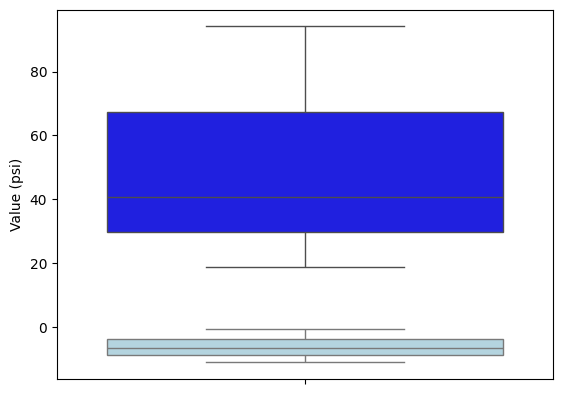

In [464]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -4.0
Value Counts: 693
Values > 100mpg: 88
Values <= 100mpg: 605
Percent above 100mpg: 12.7%
Mean MPG: 47.05
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25          18.490
1        0.50          35.882
2        0.75          60.668
Boost Quartiles
   Percentile  Value (psi)
0        0.25       -8.412
1        0.50       -4.206
2        0.75        0.290


<Axes: ylabel='Value (psi)'>

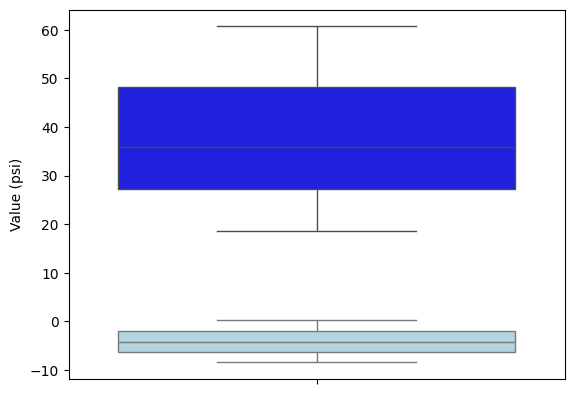

In [465]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -3.39
Value Counts: 4899
Values > 100mpg: 722
Values <= 100mpg: 4177
Percent above 100mpg: 14.74%
Mean MPG: 48.2
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25         19.2250
1        0.50         35.3280
2        0.75         58.2655
Boost Quartiles
   Percentile  Value (psi)
0        0.25       -7.687
1        0.50       -3.481
2        0.75        0.580


<Axes: ylabel='Value (psi)'>

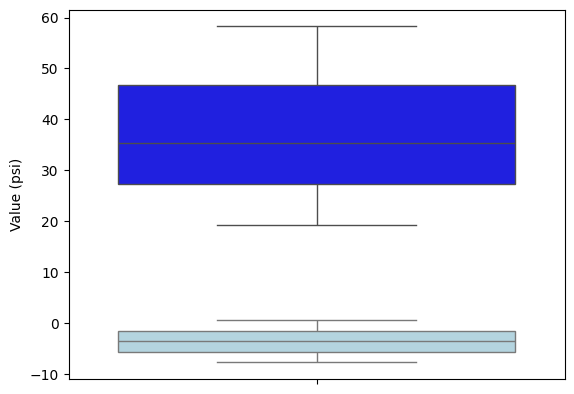

In [466]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -2.3
Value Counts: 1079
Values > 100mpg: 114
Values <= 100mpg: 965
Percent above 100mpg: 10.57%
Mean MPG: 42.86
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                   18.0340
1        0.50                   31.7030
2        0.75                   49.9875
Boost Quartiles
   Percentile  Value (psi)
0        0.25       -6.382
1        0.50       -2.321
2        0.75        1.740


<Axes: ylabel='Greater than 70mph (mpg)'>

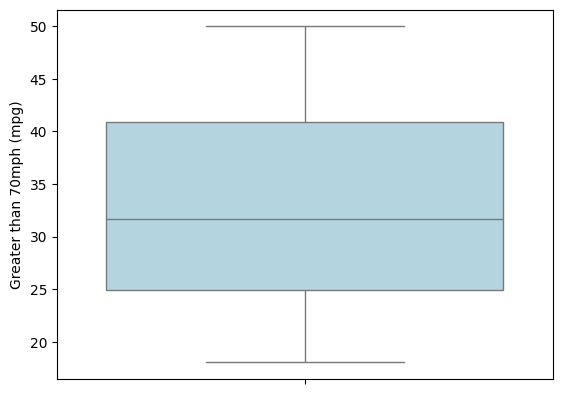

In [467]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [468]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [1028, 693, 4899, 1079]
total mpg <= 100 counts: [790, 605, 4177, 965]
total mpg > 100 counts: [238, 88, 722, 114]
% > 100mpg : [23, 12, 14, 10]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,1028,790,238,23
50-60mph,693,605,88,12
60-70mph,4899,4177,722,14
>70mph,1079,965,114,10


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25         18.8720          18.490         19.2250   
1        0.50         40.7085          35.882         35.3280   
2        0.75         94.1340          60.668         58.2655   

   Greater than 70mph (mpg)  
0                   18.0340  
1                   31.7030  
2                   49.9875  


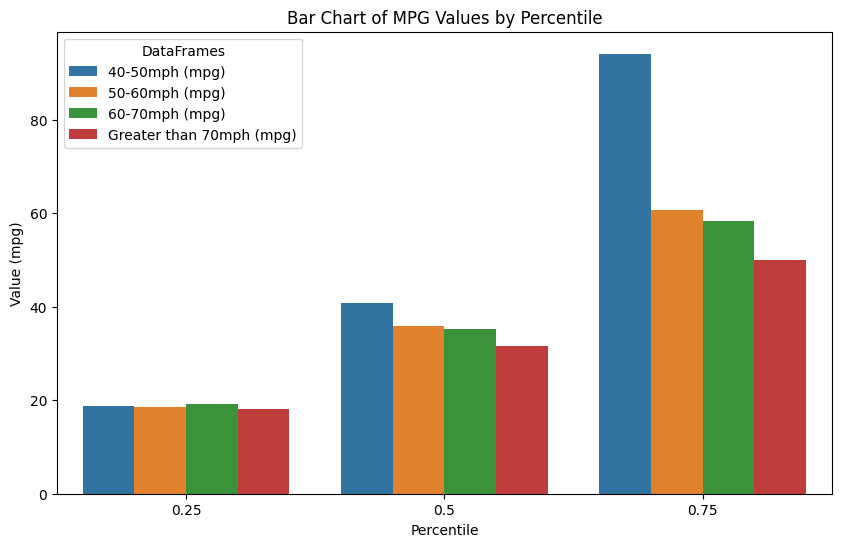

In [469]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [470]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [471]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [472]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [473]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


KeyError: "['latitude', 'longitude'] not in index"

In [ ]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [ ]:
hvexplorer = df.hvplot.explorer()
hvexplorer

In [ ]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [ ]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

In [ ]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [ ]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()